In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [55]:
data=pd.read_csv(r'C:\Users\USER\Downloads\data sets\day - day.csv')

In [56]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [57]:
data.shape

(730, 16)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [59]:
data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [60]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [61]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [62]:
data["Date"]= pd.to_datetime(data['dteday']).dt.date
data['Year']=pd.to_datetime(data['dteday']).dt.year
data.head(5) 


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date,Year
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018-01-01,2018
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018-02-01,2018
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018-03-01,2018
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018-04-01,2018
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018-05-01,2018


In [63]:
data['temp']=data['temp'].apply(lambda x: x*41)
data['atemp']=data['atemp'].apply(lambda x: x*50)
data['hum']=data['hum'].apply(lambda x:x*100)
data['windspeed']=data['windspeed'].apply(lambda x:x*61)
data.head(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date,Year
0,1,01-01-2018,1,0,1,0,1,1,2,578.544727,909.0625,8058.33,655.742802,331,654,985,2018-01-01,2018
1,2,02-01-2018,1,0,1,0,2,1,2,611.006518,884.3475,6960.87,1015.778893,131,670,801,2018-02-01,2018
2,3,03-01-2018,1,0,1,0,3,1,1,330.087884,473.5125,4372.73,1014.838883,120,1229,1349,2018-03-01,2018
3,4,04-01-2018,1,0,1,0,4,1,1,336.200000,530.3050,5904.35,655.129752,108,1454,1562,2018-04-01,2018


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
 16  Date        730 non-null    object 
 17  Year        730 non-null    int64  
dtypes: float64(4), int64(12), object(2)
memory usage: 102.8+ KB


In [65]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
Date          0
Year          0
dtype: int64

In [66]:
data['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [67]:
print('Total count of bike rentals are :', data['cnt'].sum())

Total count of bike rentals are : 3290845


In [68]:
print('Total count of bike rentals in casual method :', data['casual'].sum())

Total count of bike rentals in casual method : 619952


In [69]:
print('Total count of bike rentals in registered method :', data['registered'].sum())

Total count of bike rentals in registered method : 2670893


In [70]:
print('Total percentage of bike rentals to used in casual method:',(data['casual'].sum()/data['cnt'].sum()*100),'%')

Total percentage of bike rentals to used in casual method: 18.838687328026694 %


In [71]:
print('Total percentage of bike rentals to used in registered method:',(data['registered'].sum()/data['cnt'].sum()*100),'%')

Total percentage of bike rentals to used in registered method: 81.1613126719733 %


In [72]:
print('Mean value of bike rentals per hour is:', data['cnt'].mean())

Mean value of bike rentals per hour is: 4508.006849315068


In [73]:
print('Bike rentals per minute: ', data['cnt'].mean()//60)

Bike rentals per minute:  75.0


In [74]:
#Bike rental count of various seasons

In [75]:
count_per_season_desc =data[['season','cnt']].groupby(['season']).sum().sort_values(by='cnt',ascending=True)
count_per_season_desc

,cnt
season,
1,469514
4,841613
2,918589
3,1061129


In [76]:
#Bike rental count among 2011 and 2012

In [77]:
count_per_year =data[['Year','cnt']].groupby(['Year']).sum()
count_per_year

,cnt
Year,
2018,1243103
2019,2047742


In [78]:
#Bike rental count among various weather conditions

In [79]:
count_weather =data[['weathersit','cnt']].groupby(['weathersit']).sum()
count_weather

,cnt
weathersit,
1,2257952
2,995024
3,37869


In [80]:
#Bike rental count weekday wise

In [81]:
count_per_weekday =data[["weekday", "cnt"]].groupby(['weekday']).sum().sort_values(by='cnt',ascending=False)
count_per_weekday

,cnt
weekday,
4,487923
0,485235
6,481176
5,478132
3,462276
2,448822
1,447281


In [82]:
#Bike rental count monthly wise

In [83]:
count_per_month =data[["mnth", "cnt"]].groupby(['mnth']).sum().sort_values(by='cnt',ascending=False)
count_per_month

,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


In [84]:
data1 =data.drop(['dteday','Date'],axis =1)
data1.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Year
0,1,1,0,1,0,1,1,2,578.544727,909.0625,8058.33,655.742802,331,654,985,2018
1,2,1,0,1,0,2,1,2,611.006518,884.3475,6960.87,1015.778893,131,670,801,2018
2,3,1,0,1,0,3,1,1,330.087884,473.5125,4372.73,1014.838883,120,1229,1349,2018
3,4,1,0,1,0,4,1,1,336.200000,530.3050,5904.35,655.129752,108,1454,1562,2018
4,5,1,0,1,0,5,1,1,381.514717,573.1750,4369.57,763.860300,82,1518,1600,2018


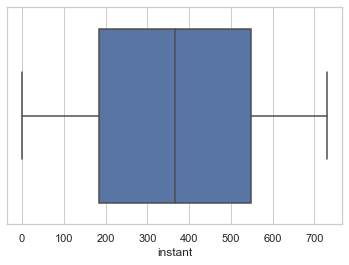

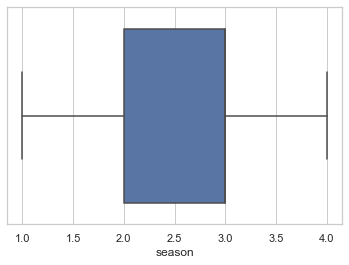

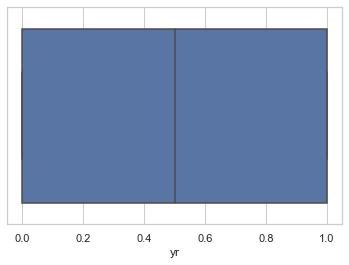

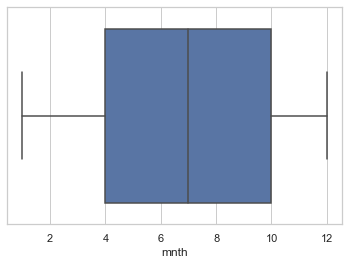

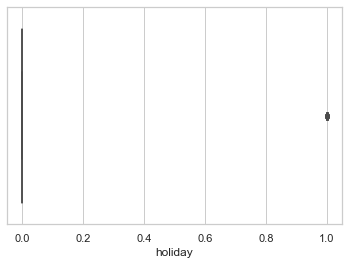

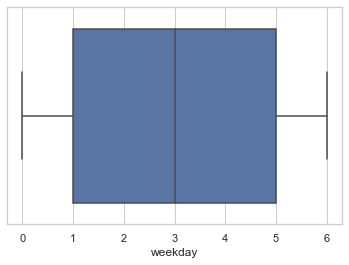

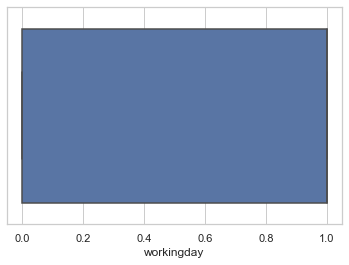

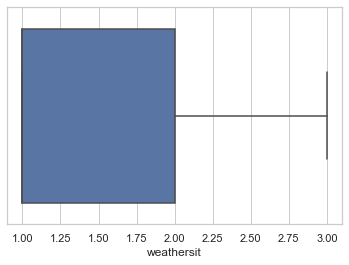

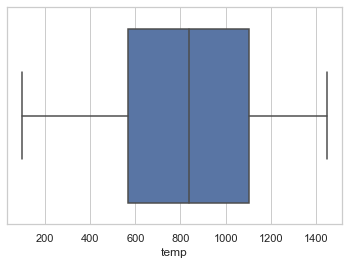

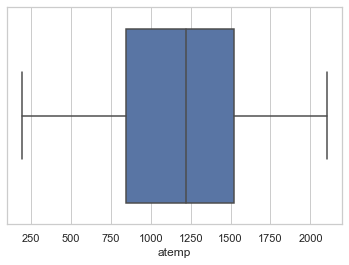

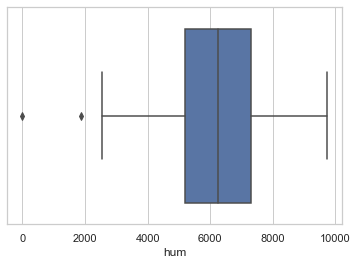

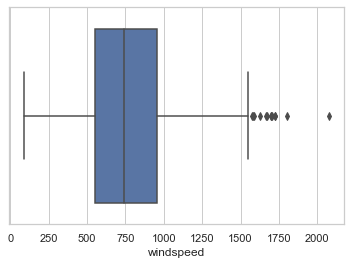

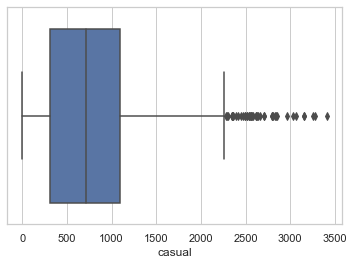

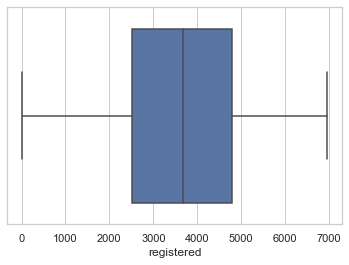

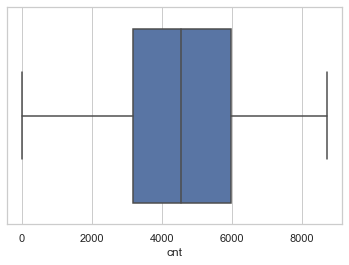

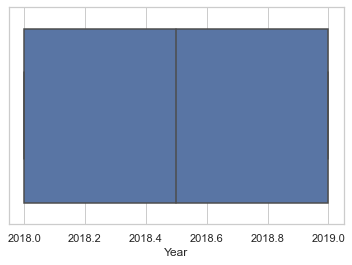

In [85]:
for i in data1:
    sns.boxplot(x=data1[i])
    plt.show()

In [86]:
#Outlier Detection

In [87]:
IQR =stats.iqr(data1.casual,interpolation='midpoint')
IQR

779.5

In [88]:
Q1 =data1.casual.quantile(0.5)
Q3 =data1.casual.quantile(0.75)
minlimit =Q1-1.5*IQR
maxlimit =Q3+1.5*IQR

In [89]:
minlimit

-452.25

In [90]:
maxlimit

2265.75

In [91]:
data1.loc[data1['casual']>maxlimit,'casual'] =np.median(data1.casual)

In [92]:
IQR =stats.iqr(data1.registered,interpolation='midpoint')
IQR

2273.0

In [93]:
data1.loc[data['registered']>maxlimit,'registered'] =np.median(data1.registered)

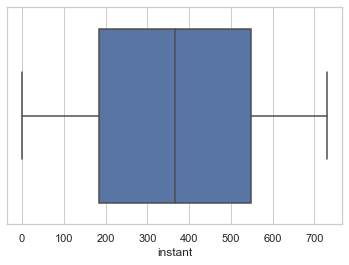

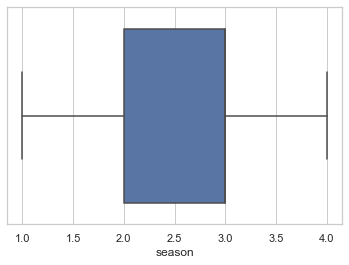

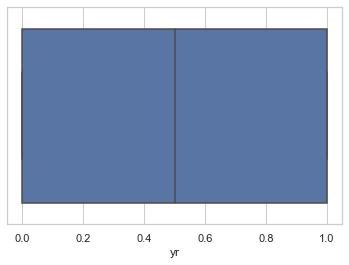

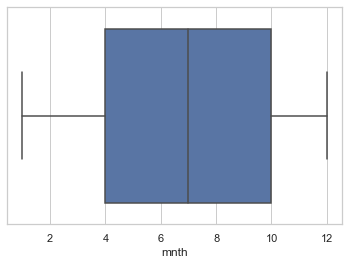

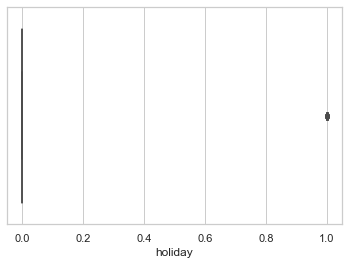

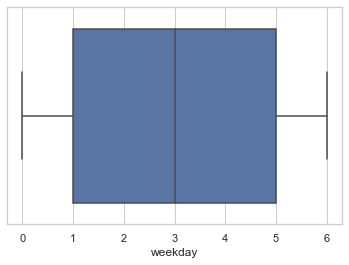

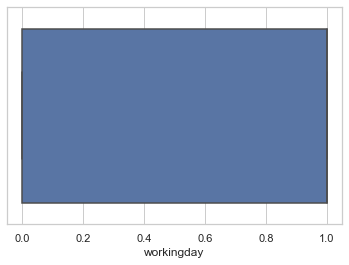

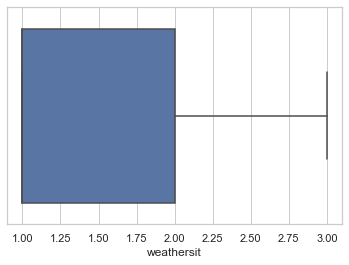

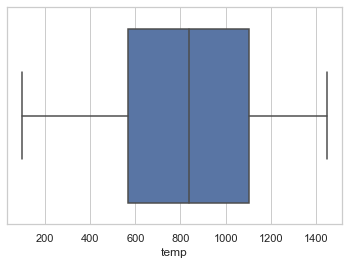

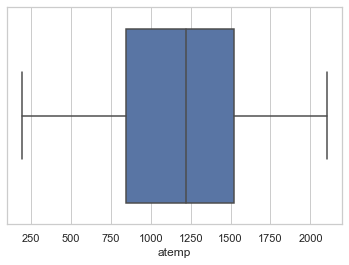

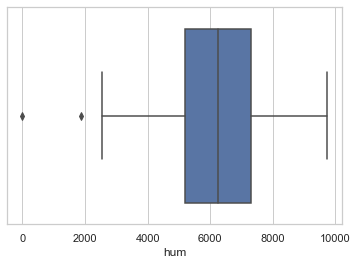

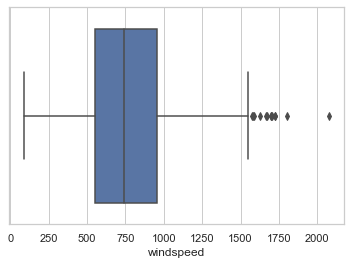

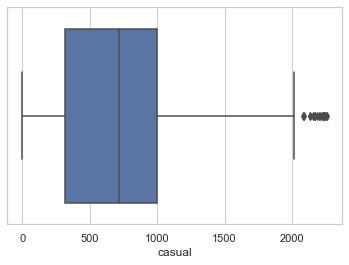

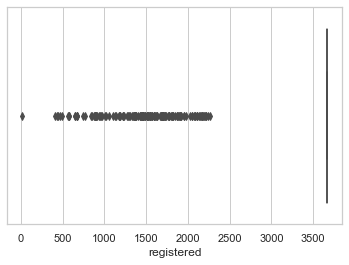

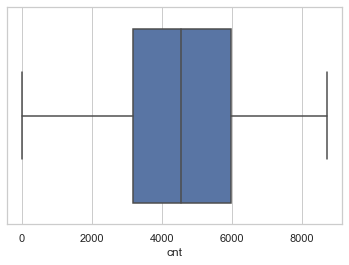

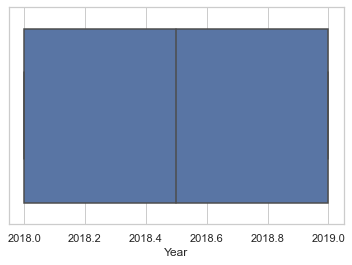

In [94]:
for i in data1:
    sns.boxplot(x=data1[i])
    plt.show()

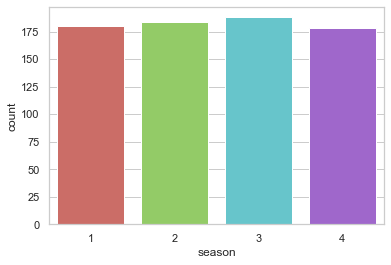

In [95]:
sns.countplot(data['season'],palette='hls')
plt.show()

In [96]:
data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
Date          730
Year            2
dtype: int64

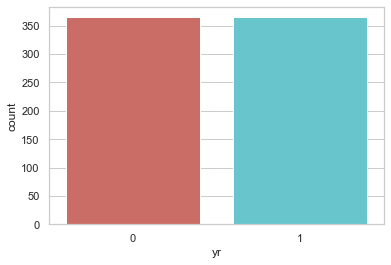

In [97]:
sns.countplot(data['yr'],palette='hls')
plt.show()

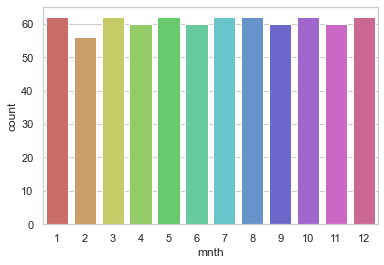

In [98]:
sns.countplot(data['mnth'],palette='hls')
plt.show()

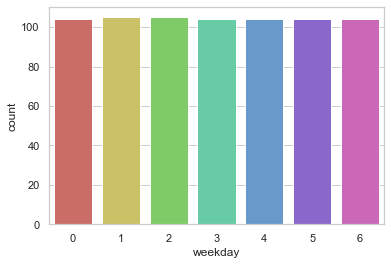

In [99]:
sns.countplot(data['weekday'],palette='hls')
plt.show()

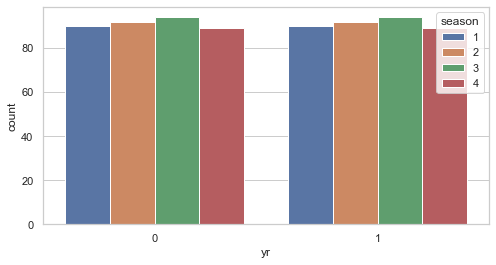

In [100]:
plt.figure(figsize=(8,4))
sns.countplot("yr",data=data,hue='season')
plt.show()

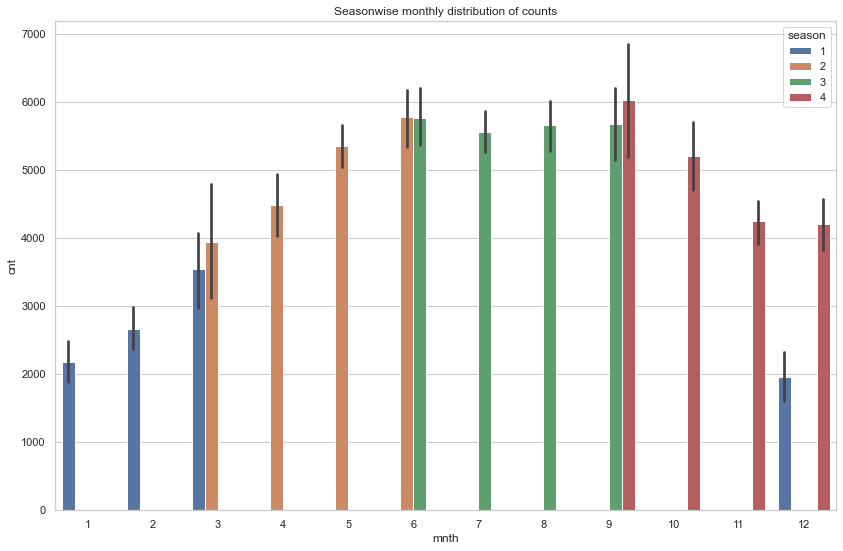

In [101]:
fig,ax=plt.subplots(figsize=(14,9))
sns.set_style('white')
sns.barplot(x='mnth',y='cnt',data=data[['mnth','cnt','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

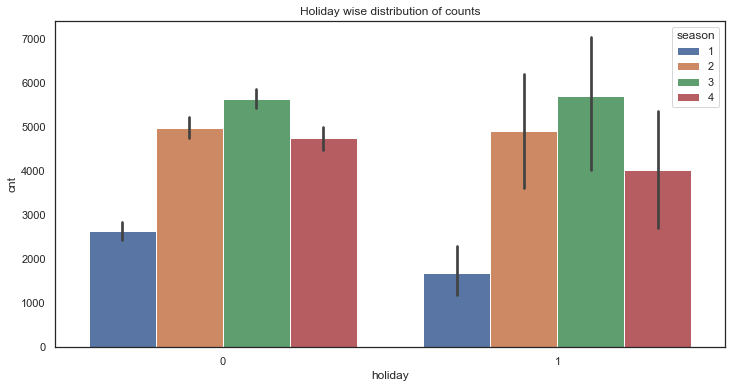

In [102]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=data,x='holiday',y='cnt',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

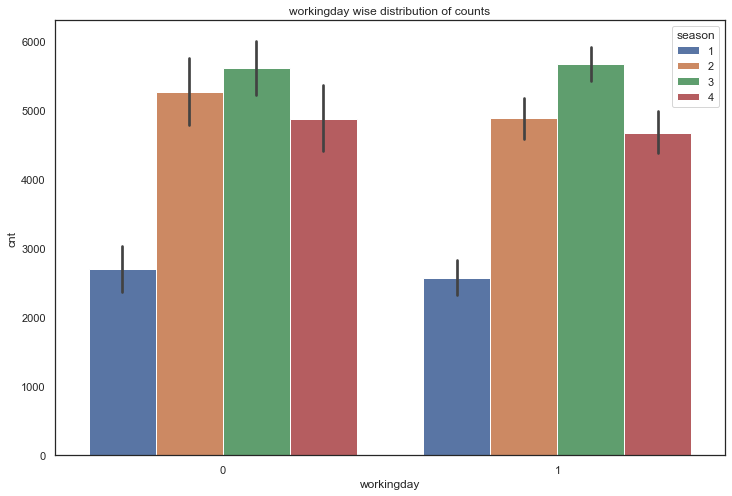

In [103]:
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(data=data,x='workingday',y='cnt',hue='season')
ax.set_title('workingday wise distribution of counts')
plt.show()

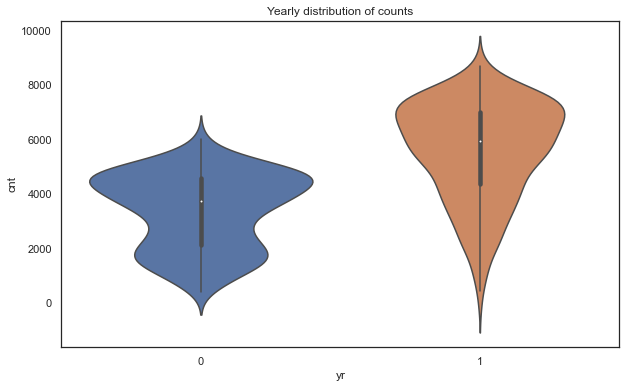

In [104]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="yr", y="cnt", data=data)
ax.set_title('Yearly distribution of counts')
plt.show()

In [105]:
x=data1.drop("cnt",axis=1)
y=data1["cnt"]

In [106]:
model=LogisticRegression()
rfe=RFE(model,12,verbose=1)
fit=rfe.fit(x,y)
print("num features:%s"%(fit.n_features_))
print("Selected features: %s"%(fit.support_))
print("Feature Ranking: %s"%(fit.ranking_))

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
num features:12
Selected features: [ True  True False  True False  True  True False  True  True  True  True
  True  True  True]
Feature Ranking: [1 1 3 1 4 1 1 2 1 1 1 1 1 1 1]


In [107]:
data1.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'Year'],
      dtype='object')

In [108]:
data2=data1.drop('yr',axis=1)
data3=data2.drop('holiday',axis=1)
data4=data3.drop('weathersit',axis=1)


In [109]:
data4

,instant,season,mnth,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Year
0,1,1,1,1,1,578.544727,909.0625,8058.33,655.742802,331,654.0,985,2018
1,2,1,1,2,1,611.006518,884.3475,6960.87,1015.778893,131,670.0,801,2018
2,3,1,1,3,1,330.087884,473.5125,4372.73,1014.838883,120,1229.0,1349,2018
3,4,1,1,4,1,336.200000,530.3050,5904.35,655.129752,108,1454.0,1562,2018
4,5,1,1,5,1,381.514717,573.1750,4369.57,763.860300,82,1518.0,1600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,12,5,1,427.254727,566.6050,6529.17,1430.993571,247,1867.0,2114,2019
726,727,1,12,6,0,425.852773,637.6150,5900.00,635.409977,644,3664.5,3095,2019
727,728,1,12,0,0,425.852773,606.0000,7529.17,508.353321,159,1182.0,1341,2019
728,729,1,12,1,1,430.055273,579.2500,4833.33,1433.531598,364,1432.0,1796,2019


In [110]:
x=data4.drop("cnt",axis=1)
y=data4["cnt"]

In [111]:
x

,instant,season,mnth,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,Year
0,1,1,1,1,1,578.544727,909.0625,8058.33,655.742802,331,654.0,2018
1,2,1,1,2,1,611.006518,884.3475,6960.87,1015.778893,131,670.0,2018
2,3,1,1,3,1,330.087884,473.5125,4372.73,1014.838883,120,1229.0,2018
3,4,1,1,4,1,336.200000,530.3050,5904.35,655.129752,108,1454.0,2018
4,5,1,1,5,1,381.514717,573.1750,4369.57,763.860300,82,1518.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,12,5,1,427.254727,566.6050,6529.17,1430.993571,247,1867.0,2019
726,727,1,12,6,0,425.852773,637.6150,5900.00,635.409977,644,3664.5,2019
727,728,1,12,0,0,425.852773,606.0000,7529.17,508.353321,159,1182.0,2019
728,729,1,12,1,1,430.055273,579.2500,4833.33,1433.531598,364,1432.0,2019


In [112]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

In [113]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [114]:
Rmodel = LinearRegression()

In [115]:
Rmodel.fit(xtrain, ytrain)

LinearRegression()

In [116]:
predR=Rmodel.predict(xtest)

In [117]:
accR=r2_score(ytest,predR)

In [118]:
accR

0.8335990780015495

In [119]:
#logistic regression

In [120]:
Lmodel=LogisticRegression()

In [121]:
Lmodel.fit(xtrain,ytrain)

LogisticRegression()

In [122]:
predL=Lmodel.predict(xtest)

In [123]:
accL=r2_score(ytest,predL)

In [124]:
accL

0.7396146959692353

In [125]:
#RandomForest Regression

In [126]:
rf=RandomForestRegressor()

In [127]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [128]:
pred=rf.predict(xtest)
acc=r2_score(ytest,pred)
acc

0.940138829111659

In [129]:
#Decisiontree Regression

In [130]:
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [131]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(max_leaf_nodes=10)

In [132]:
pred=dtr.predict(xtest)
acc=r2_score(ytest,pred)
acc

0.8701481530072485

In [133]:
#KNN Regression

In [134]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(xtrain,ytrain)
pred2=neigh.predict(xtest)

In [135]:
acc2=r2_score(ytest,pred2)
print(acc2)

0.8402109935711579


In [136]:
#Model Comparison

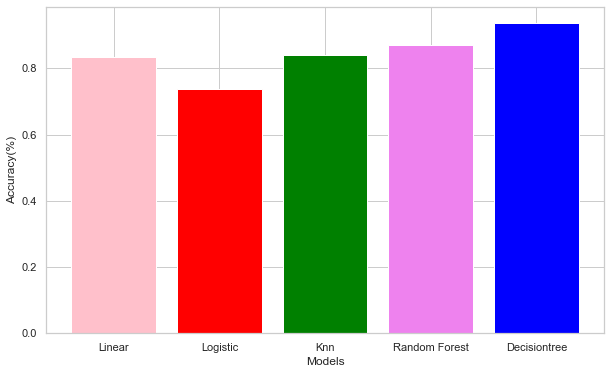

In [137]:
plt.figure(figsize=(10,6))
height = [0.833,0.739,0.840,0.870,0.938]
bars = ('Linear','Logistic', 'Knn','Random Forest','Decisiontree' )
y_pos = np.arange(len(bars))
plt.bar(bars, height,color=['pink', 'red', 'green', 'violet','blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.show()

In [138]:
data4

,instant,season,mnth,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Year
0,1,1,1,1,1,578.544727,909.0625,8058.33,655.742802,331,654.0,985,2018
1,2,1,1,2,1,611.006518,884.3475,6960.87,1015.778893,131,670.0,801,2018
2,3,1,1,3,1,330.087884,473.5125,4372.73,1014.838883,120,1229.0,1349,2018
3,4,1,1,4,1,336.200000,530.3050,5904.35,655.129752,108,1454.0,1562,2018
4,5,1,1,5,1,381.514717,573.1750,4369.57,763.860300,82,1518.0,1600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,12,5,1,427.254727,566.6050,6529.17,1430.993571,247,1867.0,2114,2019
726,727,1,12,6,0,425.852773,637.6150,5900.00,635.409977,644,3664.5,3095,2019
727,728,1,12,0,0,425.852773,606.0000,7529.17,508.353321,159,1182.0,1341,2019
728,729,1,12,1,1,430.055273,579.2500,4833.33,1433.531598,364,1432.0,1796,2019


In [139]:
#Now we can select three independent variables from the whole data that are significant

In [140]:
cols=['casual','temp','instant']
X=data[cols]
Y=data["cnt"]

In [141]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [142]:
#Linear Regression Model

In [143]:
Rmodel = LinearRegression()

In [144]:
Rmodel.fit(Xtrain, Ytrain)

LinearRegression()

In [145]:
predR=Rmodel.predict(Xtest)

In [146]:
accR=r2_score(Ytest,predR)

In [147]:
accR
print('Accuracy:',accR*100)

Accuracy: 76.21512576840621


In [157]:
m1=mean_absolute_error(Ytest,predR)

In [158]:
print('Mean Absolute Error:',m1)

Mean Absolute Error: 748.4959663209753


In [163]:
m2=mean_squared_error(Ytest,predR)

In [164]:
print('Mean Squared Error:',m2)

Mean Squared Error: 997790.4448234978


In [165]:
#Random Forest 

In [166]:
rf1=RandomForestRegressor()

In [167]:
rf1.fit(Xtrain,Ytrain)

RandomForestRegressor()

In [168]:
pred1=rf1.predict(Xtest)
accr=r2_score(Ytest,pred)
accr
print('Accuracy:',accr*100)

Accuracy: 87.01481530072485


In [171]:
m3=mean_absolute_error(Ytest,pred1)

In [172]:
print('Mean Absolute Error:',m3)

Mean Absolute Error: 474.1584474885845


In [173]:
m4=mean_squared_error(Ytest,pred1)

In [174]:
print('Mean Squared Error:',m4)

Mean Squared Error: 474056.78676621005


In [175]:
#Decision Tree Regression

In [176]:
Dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [177]:
Dtr.fit(Xtrain,Ytrain)

DecisionTreeRegressor(max_leaf_nodes=10)

In [178]:
pred2=Dtr.predict(Xtest)
acc2=r2_score(Ytest,pred2)


In [179]:
print('Accuracy:',acc2*100)

Accuracy: 78.82891944118921


In [180]:
m5=mean_absolute_error(Ytest,pred2)

In [181]:
print('Mean Absolute Error:',m5)

Mean Absolute Error: 708.1602776825354


In [182]:
m6=mean_squared_error(Ytest,pred2)

In [183]:
print('Mean Squared Error:',m6)

Mean Squared Error: 888140.1550616652


In [184]:
#KNN Model

In [185]:
KNNModel = KNeighborsRegressor(n_neighbors=2)
KNNModel.fit(Xtrain,Ytrain)
pred3=KNNModel.predict(Xtest)

In [186]:
acc3=r2_score(Ytest,pred3)


In [187]:
print('Accuracy:',acc3*100)

Accuracy: 80.51627366441758


In [188]:
m7=mean_absolute_error(Ytest,pred3)

In [189]:
print('Mean Absolute Error:',m7)

Mean Absolute Error: 614.6872146118722


In [190]:
m8=mean_squared_error(Ytest,pred3)

In [191]:
print('Mean Squared Error:',m8)

Mean Squared Error: 817354.5833333334


In [192]:
#Conclusion

In [193]:
#The bike rental count was predicted by using different machine learning models.Among these models,Random Forest Model has the 
#highest accuracy 